In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../input/graduate-admissions/Admission_Predict.csv')
df = df.drop(columns=['Serial No.'])
df.columns = ['GRE_score', 'TOEFL_score', 'university_rating', 'statement_of_purpose', 'letter_of_recommendation', 'GPA', 'research','chance_of_admit']
target=df['chance_of_admit']
X=df.drop(columns=['chance_of_admit'])
y=target[:,np.newaxis]             
             
#y=pd.DataFrame(data=y)

In [3]:
display(X.head(n=5))
#display(y.head(n=5))

,GRE_score,TOEFL_score,university_rating,statement_of_purpose,letter_of_recommendation,GPA,research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
features=pd.DataFrame(data=X)
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(features)
X=pd.DataFrame(data=X)

In [5]:
display(X.head(n=5))

,0,1,2,3,4,5,6
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0


In [6]:
print("Total samples in our dataset is: {}".format(X.shape[0]))


Total samples in our dataset is: 400


In [7]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

In [8]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

In [9]:
n_samples = len(y)

mu = np.mean(X, 0)
sigma = np.std(X, 0)

X = (X-mu) / sigma

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

Initial cost is:  0.27248475 

Optimal parameters are: 
 [[ 0.72434979]
 [ 0.02206054]
 [ 0.01877297]
 [ 0.00691972]
 [-0.00269297]
 [ 0.02049888]
 [ 0.06659201]
 [ 0.01199375]] 

Final cost is:  [0.00199526]


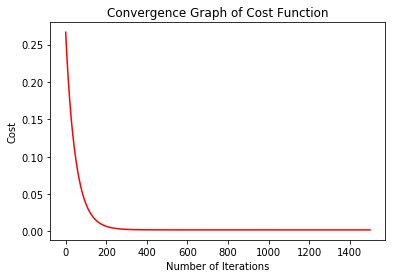

In [10]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()



In [11]:
def scale(x, out_range=(-1, 1), axis=None):
    domain = np.min(x, axis), np.max(x, axis)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

In [12]:
gre,tfl,ur,sop,lor,gpa,research=[float(x) for x in input('enter gre,tfl,ur,sop,lor,gpa,research').split(',')]

ans=([gre,tfl,ur,sop,lor,gpa,research])
#ans=scaler.fit_transform(ans)
ans=scale(ans,out_range=(0,1))
ans1=optimal_params[0]+ans[0]*optimal_params[1]+ans[1]*optimal_params[2]+ans[2]*optimal_params[3]+ans[3]*optimal_params[4]+ans[4]*optimal_params[5]+ans[5]*optimal_params[6]+ans[6]*optimal_params[7]
ans1=(ans1*100)
print("chances:",ans1)


StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

In [13]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params
lr=LinearRegression    
    

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
df = pd.read_csv('../input/graduate-admissions/Admission_Predict.csv')
df = df.drop(columns=['Serial No.'])
df.columns = ['GRE_score', 'TOEFL_score', 'university_rating', 'statement_of_purpose', 'letter_of_recommendation', 'GPA', 'research','chance_of_admit']
y=df['chance_of_admit']
X=df.drop(columns=['chance_of_admit'])
 

X_train, X_test, y_train, y_test = train_test_split(\
                                               X, y, test_size=0.3, random_state=42)
our_regressor = lr(X_train, y_train).fit()
sklearn_regressor = LinearRegression().fit(X_train, y_train)

our_train_accuracy = our_regressor.score()
sklearn_train_accuracy = sklearn_regressor.score(X_train, y_train)

our_test_accuracy = our_regressor.score(X_test, y_test)
sklearn_test_accuracy = sklearn_regressor.score(X_test, y_test)

pd.DataFrame([[our_train_accuracy, sklearn_train_accuracy],[our_test_accuracy, sklearn_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'],    
             ['Our Implementation', 'Sklearn\'s Implementation'])


,Our Implementation,Sklearn's Implementation
Training Accuracy,0.801981,0.801981
Test Accuracy,0.785272,0.795599
